# Latest Corona Virus Data Visulization

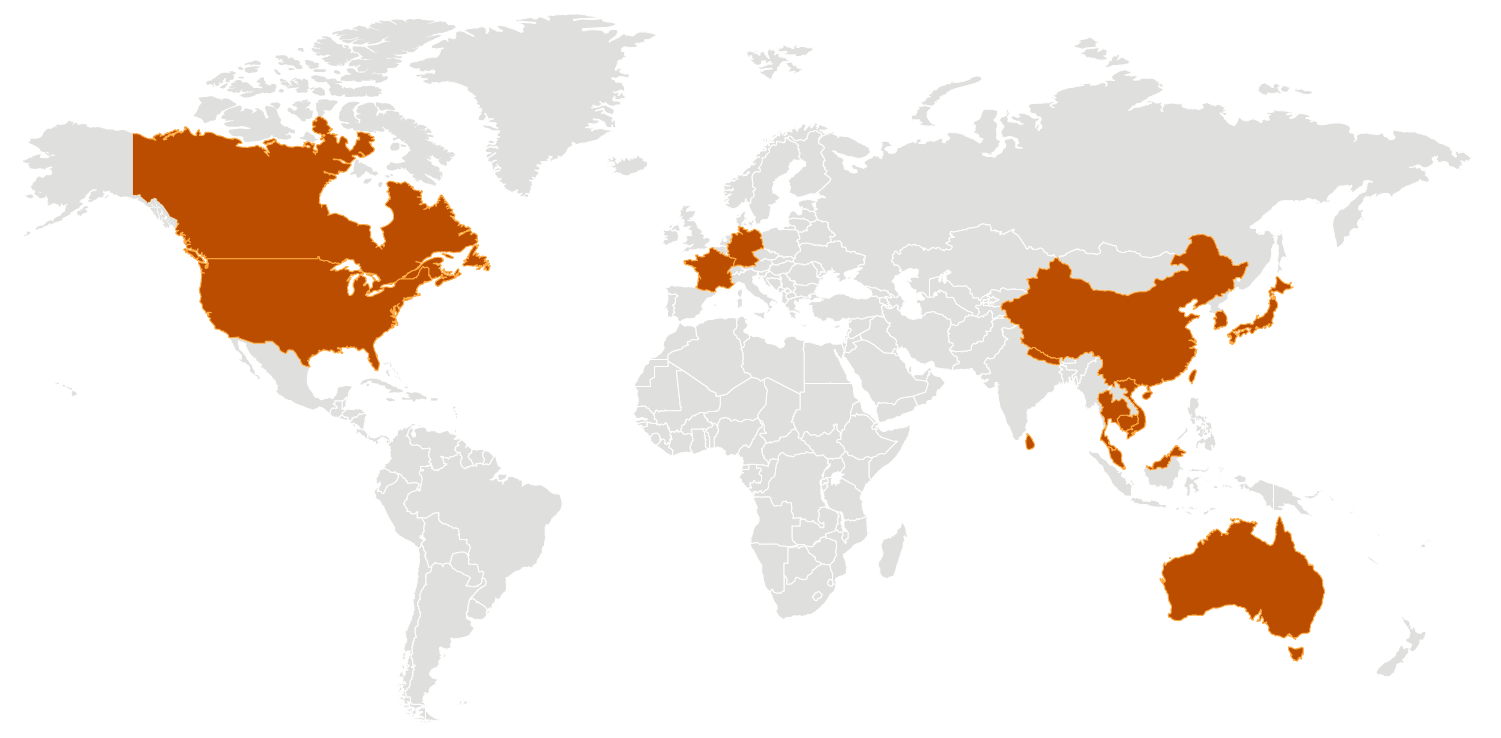

## Introduction
The 2019-nCoV is a contagious coronavirus that hailed from Wuhan, China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. This dataset will help us understand how 2019-nCoV is spread aroud the world.

## Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visulizations
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200127.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200128.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nC0v_20200121_20200126 - SUMMARY.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nC0v_20200121_20200126_cleaned.csv


In [2]:
file = pd.read_csv("/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nC0v_20200121_20200126_cleaned.csv")
file = file.drop(['Unnamed: 0'], axis = 1) 
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
Province/State       368 non-null object
Country              368 non-null object
Date last updated    368 non-null object
Confirmed            368 non-null float64
Suspected            368 non-null float64
Recovered            368 non-null float64
Deaths               368 non-null float64
dtypes: float64(4), object(3)
memory usage: 20.2+ KB


- **Province/State ** - City of virus suspected cases.
- **Country** - Country of virus suspected cases.
- **Date last updated	** - Date of update of patient infected
- **Confirmed** - Confirmation by doctors that this patient is infected with deadly virus
- **Suspected** - Number of cases registered
- **Recovered** - Recovery of the patient
- **Deaths** - Death of the patient due to corna virus.


Some Staticals calculations on dataset

In [3]:
round(file.describe())

,Confirmed,Suspected,Recovered,Deaths
count,368.0,368.0,368.0,368.0
mean,28.0,5.0,1.0,1.0
std,108.0,25.0,5.0,5.0
min,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,0.0
50%,4.0,0.0,0.0,0.0
75%,16.0,0.0,0.0,0.0
max,1058.0,244.0,42.0,52.0


In [4]:
# first few record of the dataset
file.head(10)

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
5,Sichuan,Mainland China,1/21/2020,2.0,1.0,0.0,0.0
6,Tianjin,Mainland China,1/21/2020,2.0,0.0,0.0,0.0
7,Ningxia,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
8,Anhui,Mainland China,1/21/2020,0.0,3.0,0.0,0.0
9,Shandong,Mainland China,1/21/2020,1.0,0.0,0.0,0.0


Ok, now that we have a glimpse of the data, let's explore them.

## Data Explorations & Visulizations

### Relationship Between Confirmend,Suspected,Recovered and Death by Contry and States

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x432 with 0 Axes>

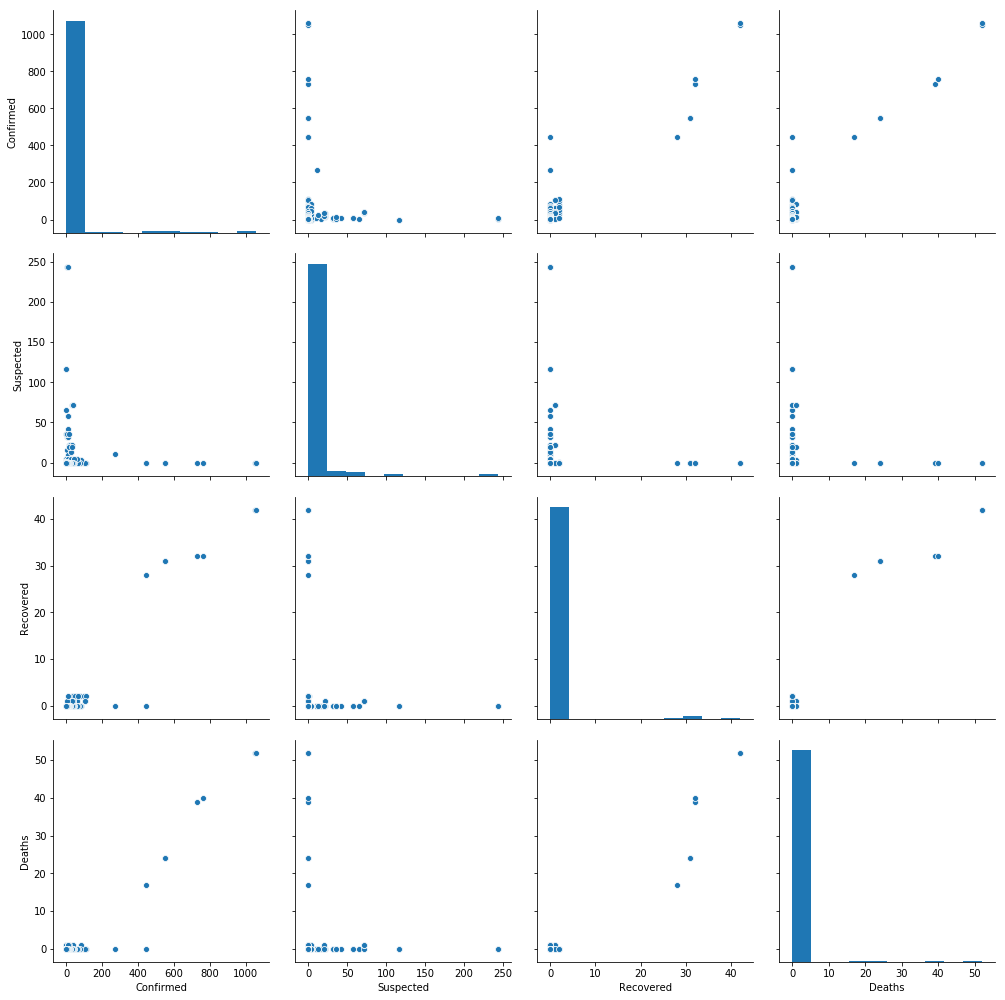

In [5]:
plt.figure(figsize=(20,6))
sns.pairplot(file, size=3.5);

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1440x432 with 0 Axes>

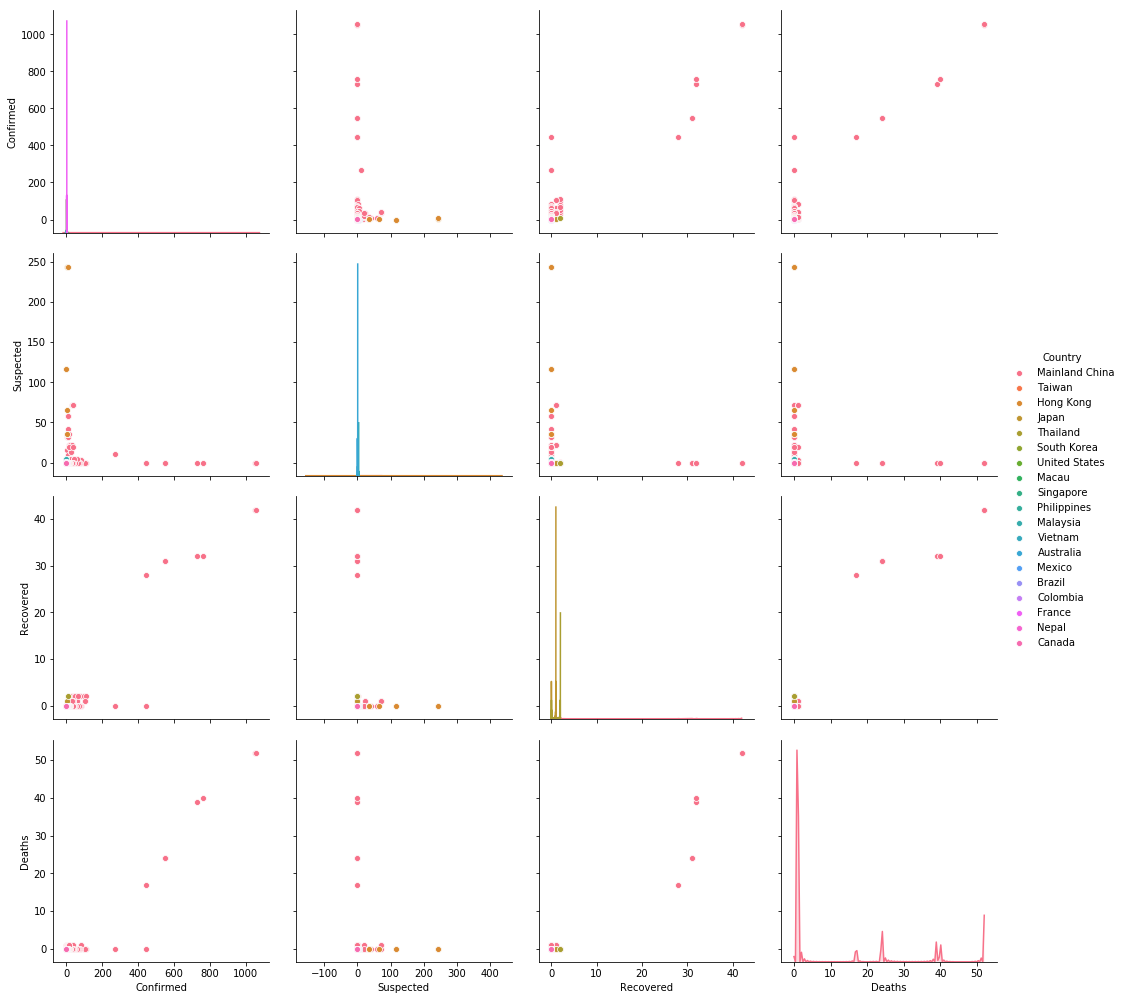

In [6]:
plt.figure(figsize=(20,6))
sns.pairplot(file,hue='Country' ,size=3.5);

<Figure size 1440x432 with 0 Axes>

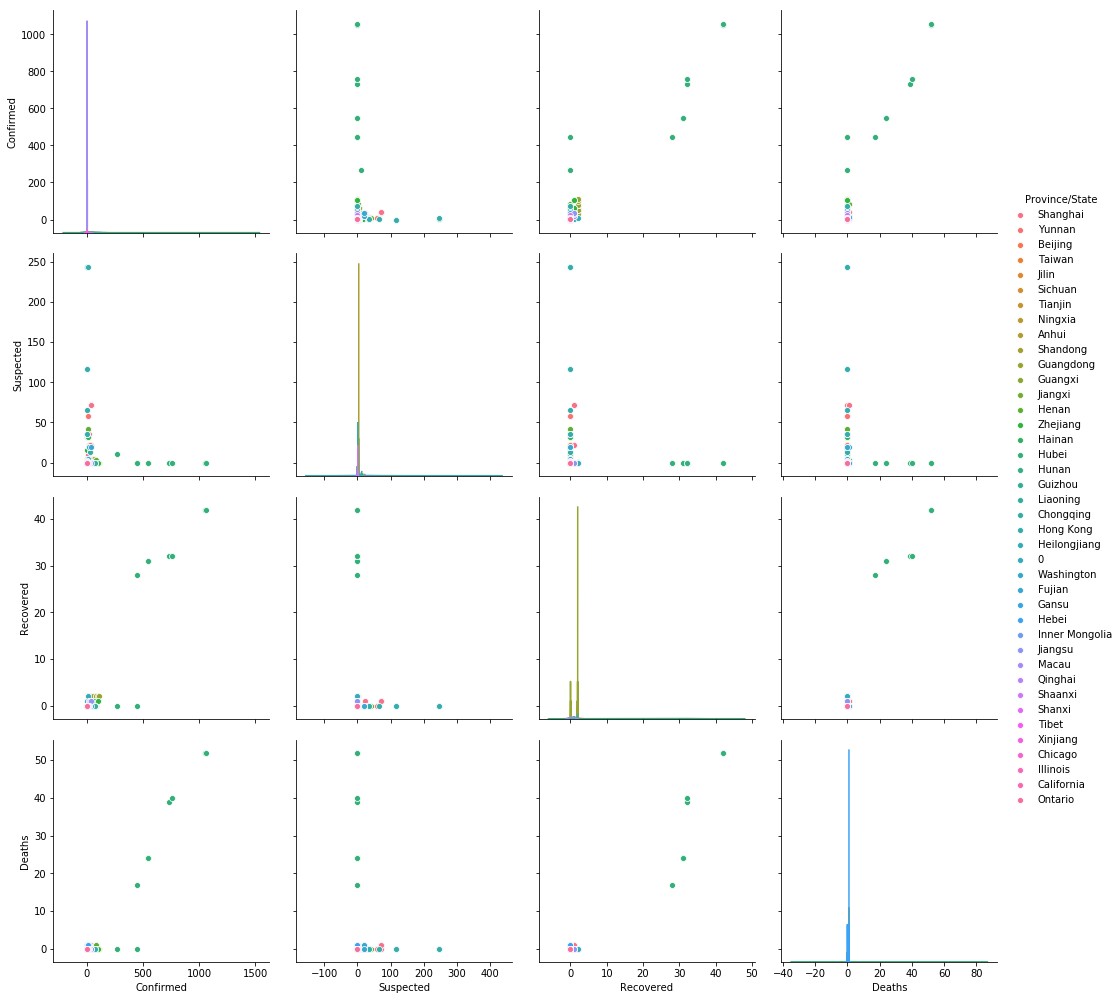

In [7]:
plt.figure(figsize=(20,6))
sns.pairplot(file,hue='Province/State' ,size=3.5);

### Country and State wise Explorations

In [8]:
data= pd.DataFrame(file.groupby(['Country'])['Confirmed','Suspected','Recovered','Deaths'].agg('sum')).reset_index()
data.head(19)

,Country,Confirmed,Suspected,Recovered,Deaths
0,Australia,13.0,1.0,0.0,0.0
1,Brazil,0.0,1.0,0.0,0.0
2,Canada,1.0,0.0,0.0,0.0
3,Colombia,0.0,1.0,0.0,0.0
4,France,14.0,0.0,0.0,0.0
5,Hong Kong,29.0,1139.0,0.0,0.0
6,Japan,18.0,0.0,1.0,0.0
7,Macau,18.0,0.0,0.0,0.0
8,Mainland China,10053.0,839.0,275.0,265.0
9,Malaysia,13.0,4.0,0.0,0.0


Text(0, 0.5, 'Number of Confirmed Patients')

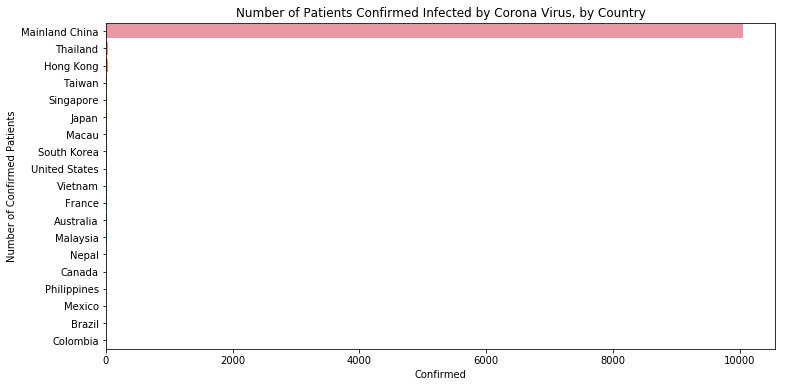

In [9]:
data= pd.DataFrame(file.groupby(['Country'])['Confirmed','Suspected','Recovered','Deaths'].agg('sum')).reset_index()

data.sort_values(by=['Confirmed'], inplace=True,ascending=False)

plt.figure(figsize=(12,6))

#  title
plt.title("Number of Patients Confirmed Infected by Corona Virus, by Country")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(y=data['Country'],x=data['Confirmed'],orient='h')

# Add label for vertical axis
plt.ylabel("Number of Confirmed Patients")

Text(0, 0.5, 'Number of Suspected Patients')

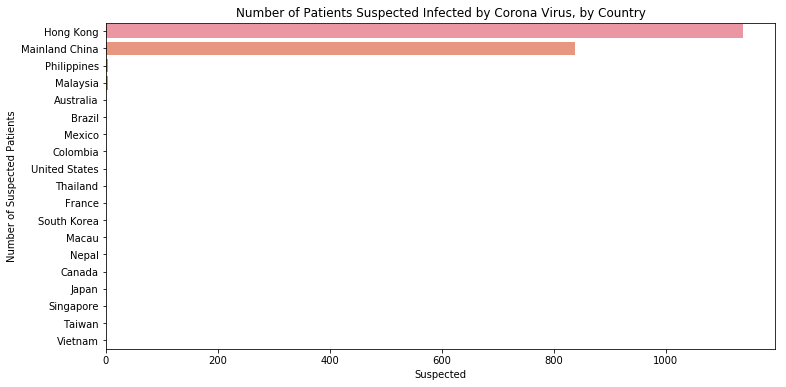

In [10]:
data.sort_values(by=['Suspected'], inplace=True,ascending=False)

plt.figure(figsize=(12,6))

#  title
plt.title("Number of Patients Suspected Infected by Corona Virus, by Country")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(y=data['Country'],x=data['Suspected'],orient='h')

# Add label for vertical axis
plt.ylabel("Number of Suspected Patients")

Text(0, 0.5, 'Number of Recovered Patients')

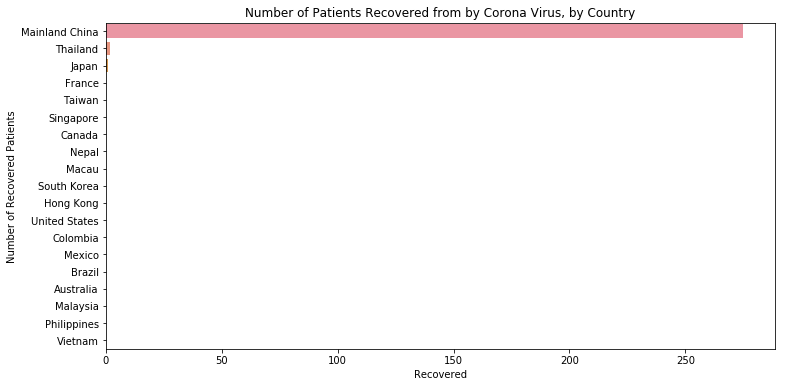

In [11]:
data.sort_values(by=['Recovered'], inplace=True,ascending=False)

plt.figure(figsize=(12,6))

#  title
plt.title("Number of Patients Recovered from by Corona Virus, by Country")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(y=data['Country'],x=data['Recovered'],orient='h')

# Add label for vertical axis
plt.ylabel("Number of Recovered Patients")

Text(0, 0.5, 'Number of Deaths')

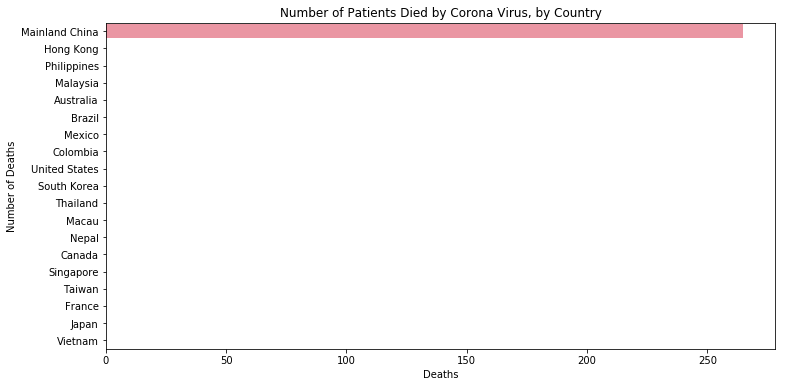

In [12]:
data.sort_values(by=['Deaths'], inplace=True,ascending=False)

plt.figure(figsize=(12,6))

#  title
plt.title("Number of Patients Died by Corona Virus, by Country")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(y=data['Country'],x=data['Deaths'],orient='h')

# Add label for vertical axis
plt.ylabel("Number of Deaths")

As we got the insight that china and some other countries near by china have many cases.

## Sates of China

In [13]:
china= file[file['Country'] == 'Mainland China']
china_data= pd.DataFrame(china.groupby(['Province/State'])['Confirmed','Suspected','Recovered','Deaths'].agg('sum')).reset_index()
china_data.head(35)

,Province/State,Confirmed,Suspected,Recovered,Deaths
0,Anhui,238.0,35.0,0.0,0.0
1,Beijing,304.0,22.0,8.0,0.0
2,Chongqing,338.0,26.0,0.0,0.0
3,Fujian,102.0,70.0,0.0,1.0
4,Gansu,28.0,0.0,0.0,0.0
5,Guangdong,546.0,6.0,14.0,0.0
6,Guangxi,158.0,2.0,0.0,0.0
7,Guizhou,28.0,1.0,0.0,0.0
8,Hainan,102.0,97.0,0.0,0.0
9,Hebei,48.0,0.0,0.0,7.0


Text(0, 0.5, 'Number of Confirmed Patients')

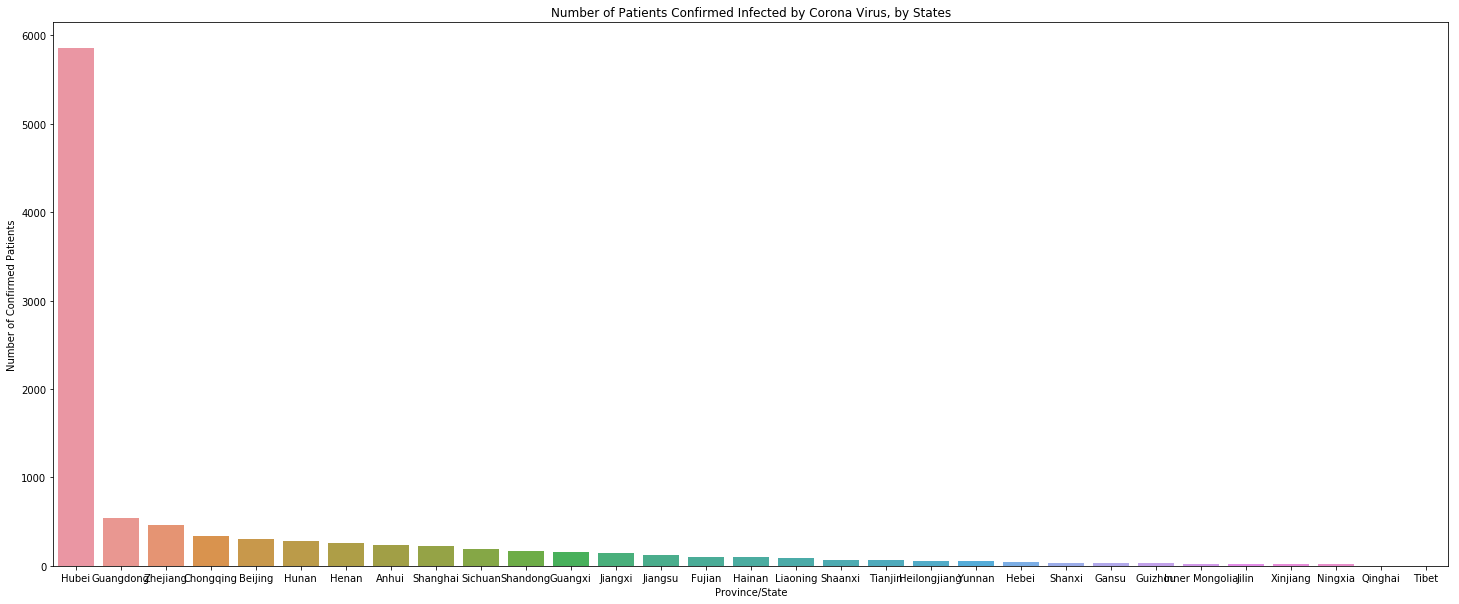

In [14]:
china_data.sort_values(by=['Confirmed'], inplace=True,ascending=False)

plt.figure(figsize=(25,10))

#  title
plt.title("Number of Patients Confirmed Infected by Corona Virus, by States")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(x=china_data['Province/State'],y=china_data['Confirmed'],orient='v')


# Add label for vertical axis
plt.ylabel("Number of Confirmed Patients")

Text(0, 0.5, 'Number of Deaths')

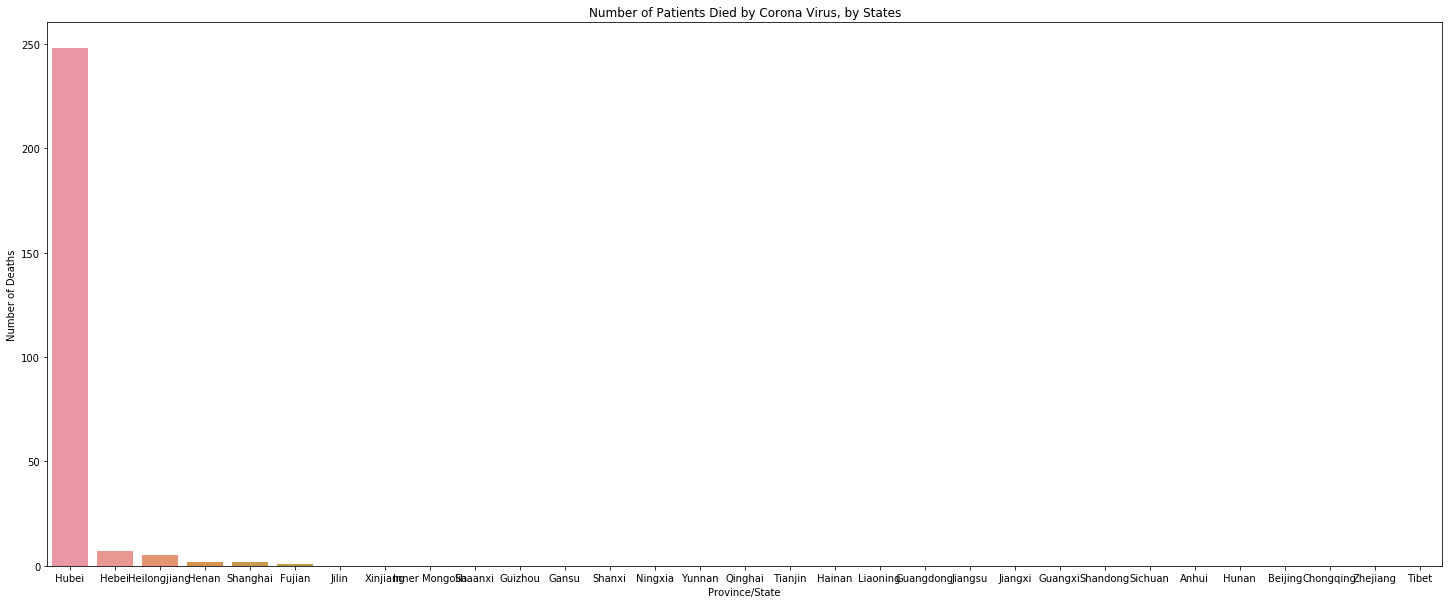

In [15]:
china_data.sort_values(by=['Deaths'], inplace=True,ascending=False)

plt.figure(figsize=(25,10))

#  title
plt.title("Number of Patients Died by Corona Virus, by States")

# Bar chart showing Number of Patients Confirmed Infected by Corona Virus, by Country
sns.barplot(x=china_data['Province/State'],y=china_data['Deaths'],orient='v')


# Add label for vertical axis
plt.ylabel("Number of Deaths")

This is not end I am still exploring data